In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


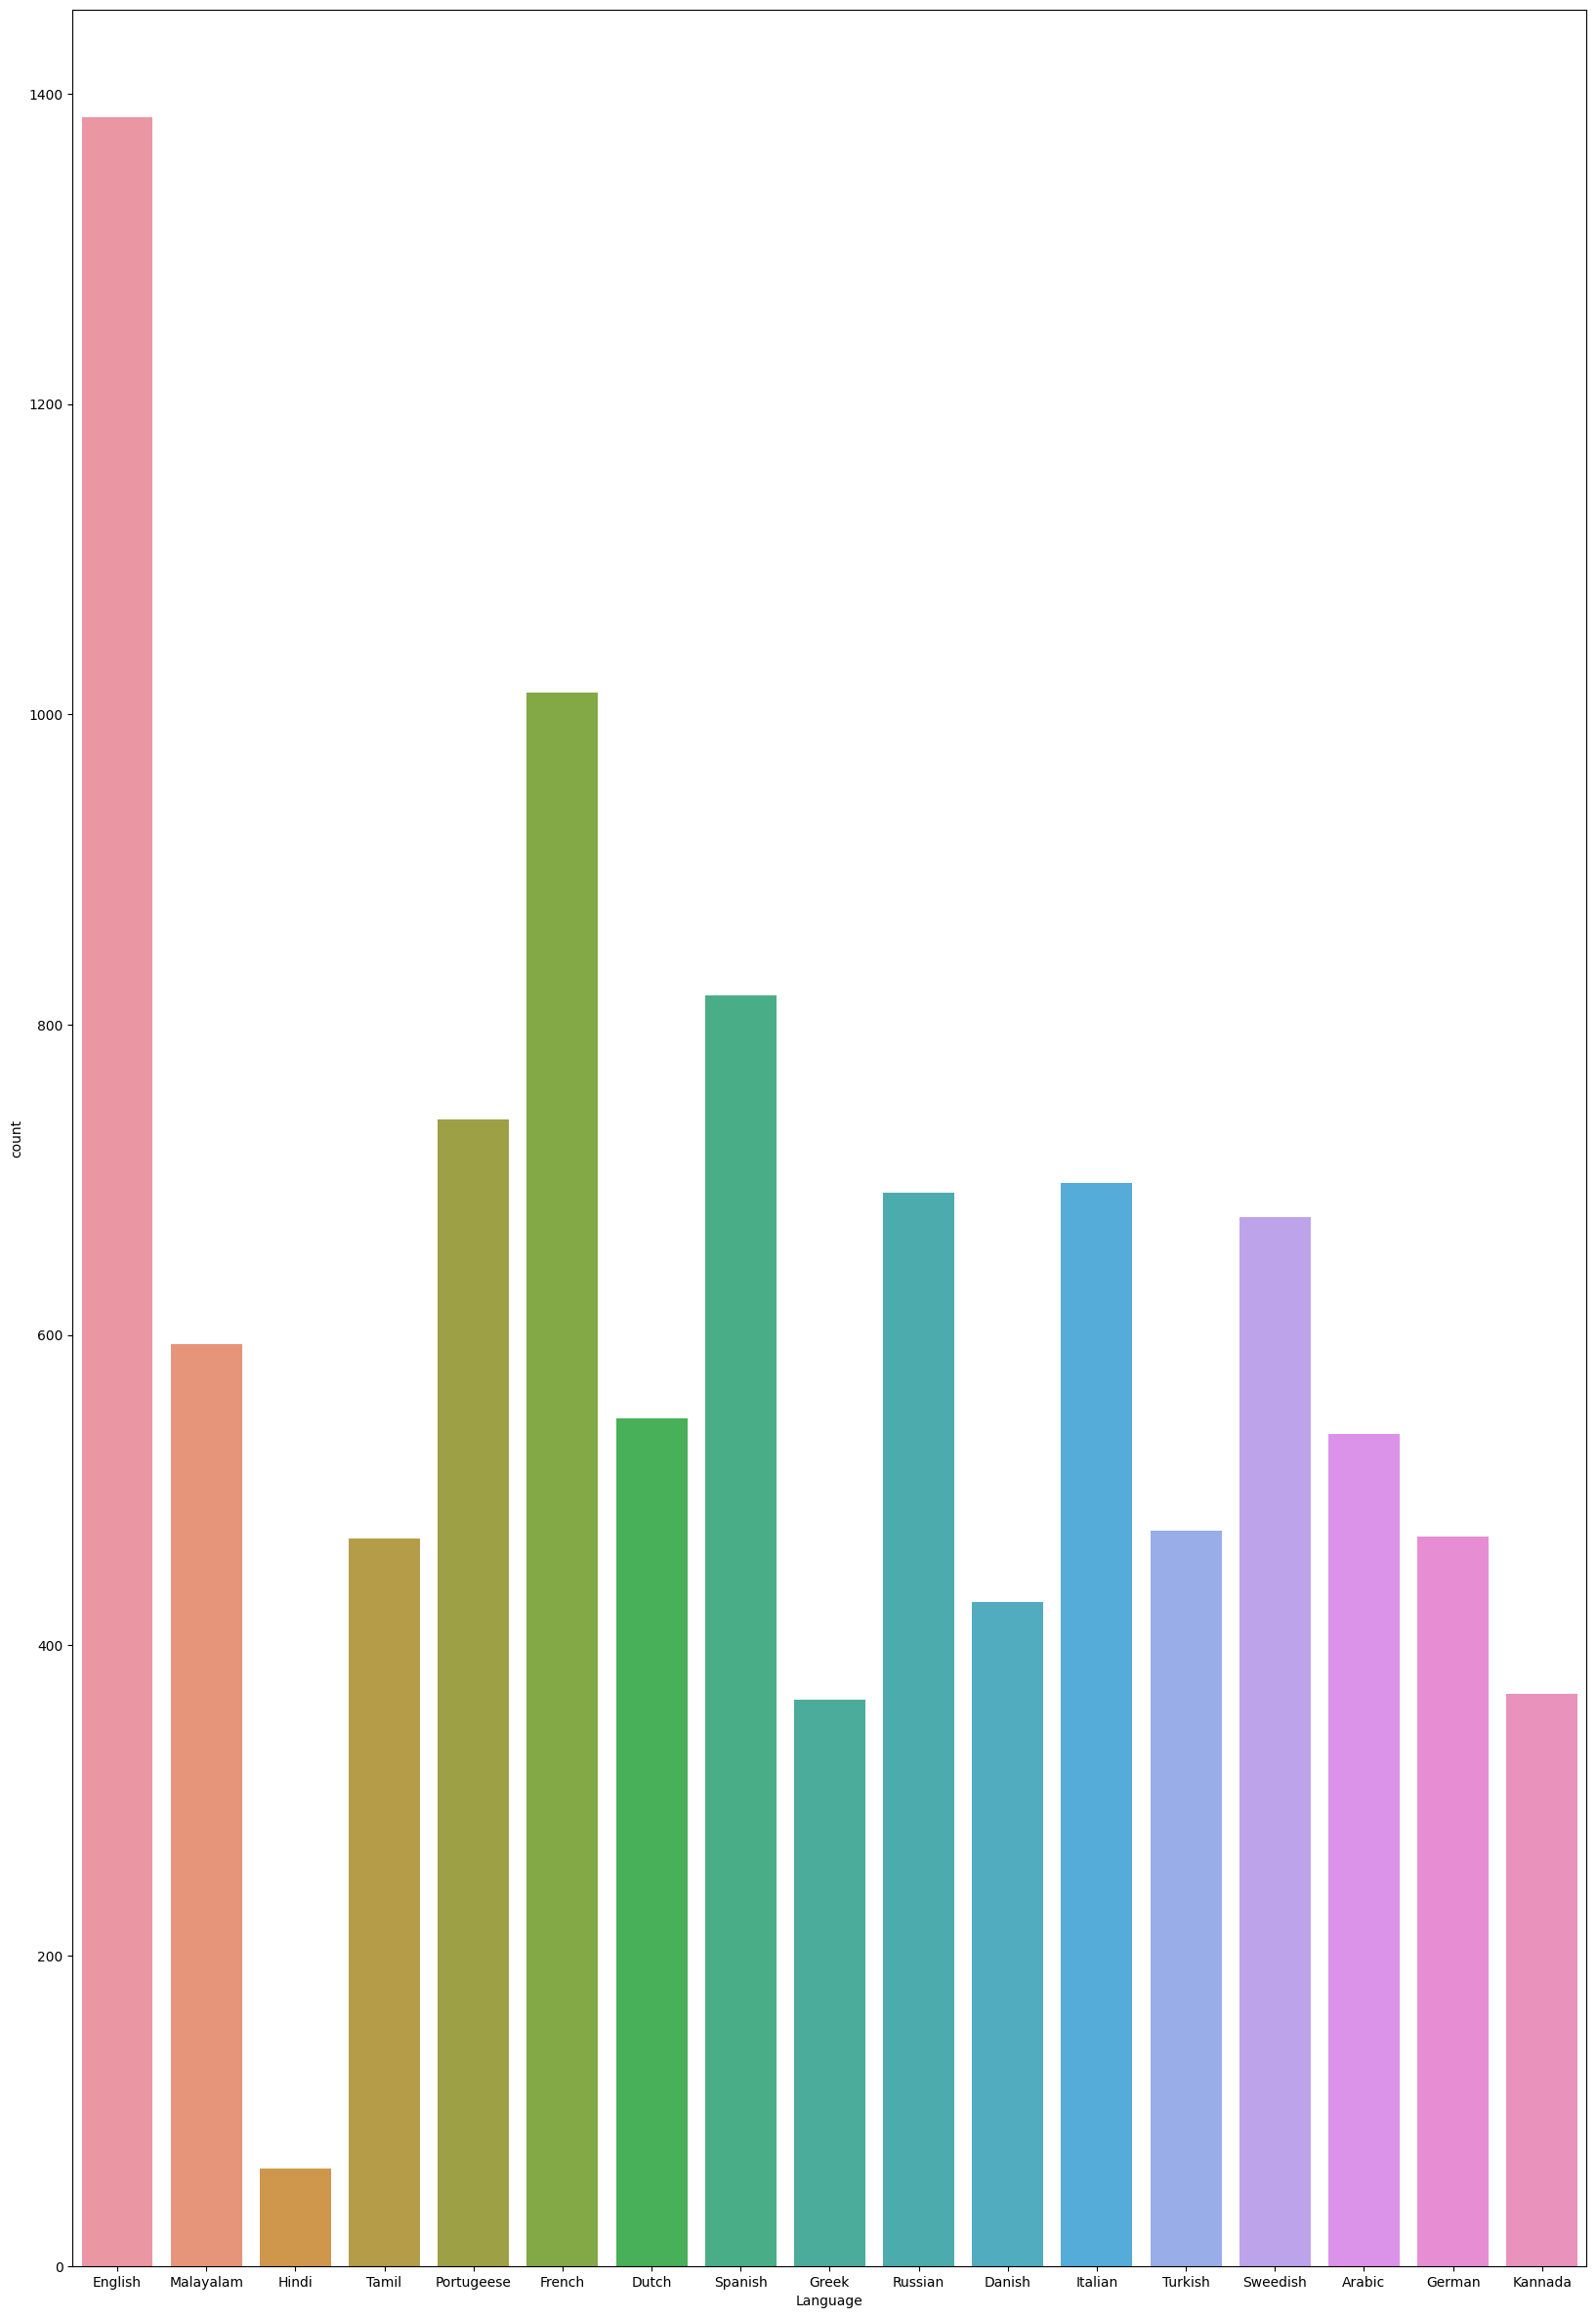

In [3]:
plt.figure(figsize=[20,30])
sns.countplot(x='Language',data=df)
plt.show()

In [4]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [5]:
from nltk.corpus import stopwords
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [7]:
text = " ".join(df[df["Language"] == 'English']["Text"])
wordcloud = WordCloud(width=800,height=400, background_color = 'white', stopwords = set(stopwords.words('english'))).generate(text)

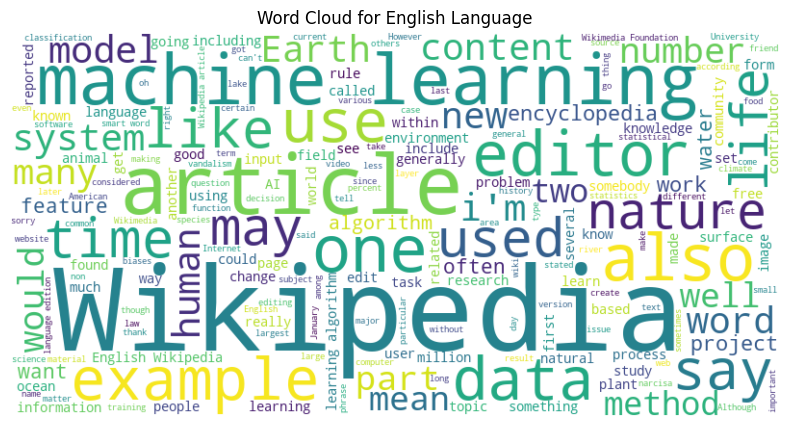

In [8]:
plt.figure(figsize=[10,5])
plt.imshow(wordcloud,interpolation = 'bilinear') #interpolation bilinear means smoother experience when resizing image
plt.title("Word Cloud for English Language")
plt.axis("off")
plt.show()

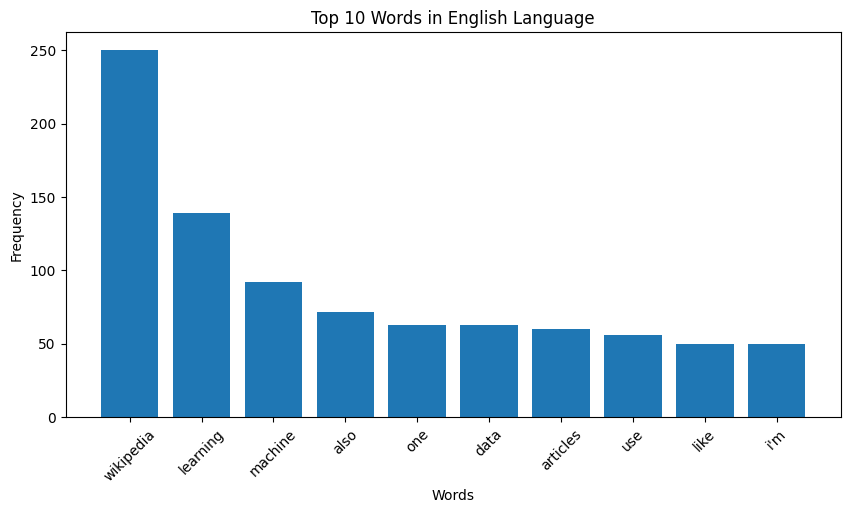

In [9]:
# Bar chart for top N words in each language
top_n = 10
text = " ".join(df[df['Language'] == 'English']['Text'])
text = text.lower()
words = text.split()
words = [word for word in words if word not in set(stopwords.words('english'))]
word_freq = nltk.FreqDist(words)
common_words = word_freq.most_common(top_n)
x_values, y_values = zip(*common_words)
plt.figure(figsize=(10, 5))

plt.bar(x_values, y_values)
plt.title(f"Top {top_n} Words in English Language")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [10]:
df.shape

(10337, 2)

In [11]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [12]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [13]:
x=np.array(df['Text'])
y=np.array(df['Language'])

cv=CountVectorizer(lowercase=True)
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [14]:
#Visualizing the CountVectorizer
print(X.toarray()[0])
fn = cv.get_feature_names_out()
print(fn)

[0 0 0 ... 0 0 0]
['00' '000' '000க' ... 'ൾക' 'ൾപ' 'ൾമ']


In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8704061895551257

In [16]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_24867 <= 0.50
|   |--- feature_6978 <= 0.50
|   |   |--- feature_38187 <= 0.50
|   |   |   |--- feature_6385 <= 0.50
|   |   |   |   |--- feature_39159 <= 0.50
|   |   |   |   |   |--- feature_17593 <= 0.50
|   |   |   |   |   |   |--- feature_36665 <= 0.50
|   |   |   |   |   |   |   |--- feature_1603 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_29447 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_12092 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_12515 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 699
|   |   |   |   |   |   |   |   |   |   |--- feature_12515 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: German
|   |   |   |   |   |   |   |   |   |--- feature_12092 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Dutch
|   |   |   |   |   |   |   |   |--- feature_29447 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Greek
|   |   |   |   |   |   |   |--- feature_16

c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  ann.update_bbox_position_size(renderer)
c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Matplotlib currently does not support Tamil natively.
  ann.update_bbox_position_size(renderer)
c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 2995 (\N{TAMIL LETTER LLA}) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\a21ma\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  func(*args, **kwargs)
C:\Users\a21ma\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Matplotlib currently does not support Tamil natively.
  func(*args

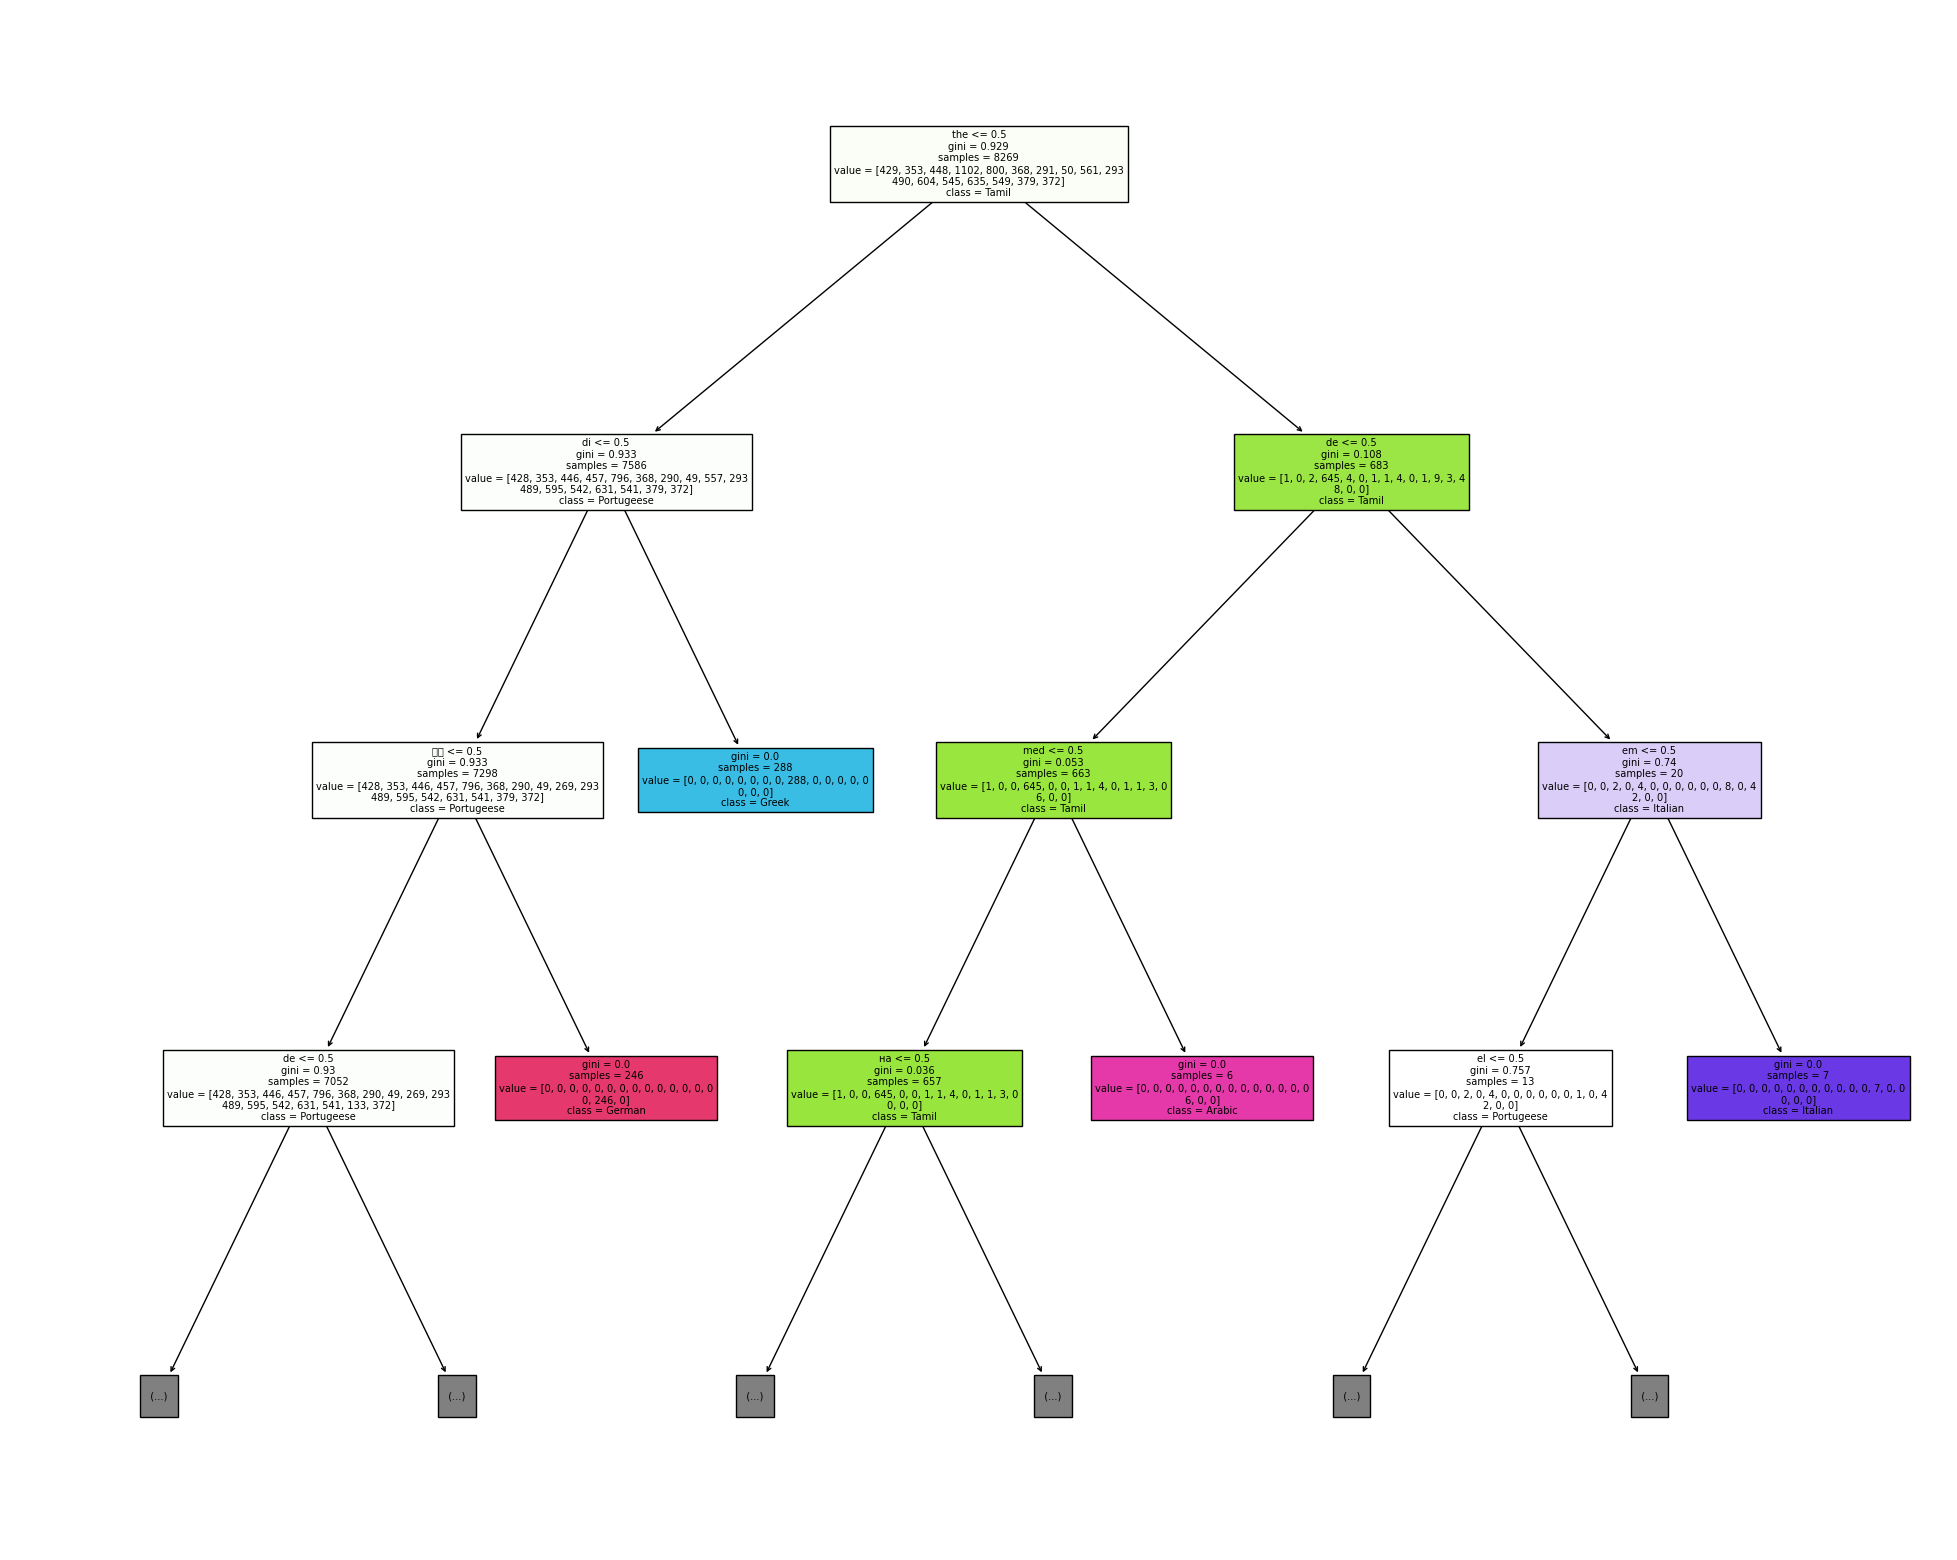

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=fn,
                   class_names=df['Language'].unique(),
                   filled=True,
                   max_depth=3) #increase max depth to see a more detailed version

In [18]:
model=MultinomialNB(alpha=0.05)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9859767891682786

In [19]:
pred=model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       107
      Danish       1.00      0.97      0.99        75
       Dutch       0.99      1.00      0.99        98
     English       0.98      1.00      0.99       283
      French       1.00      0.99      1.00       214
      German       1.00      0.97      0.99       102
       Greek       1.00      1.00      1.00        74
       Hindi       1.00      0.92      0.96        13
     Italian       0.99      0.99      0.99       137
     Kannada       0.92      0.96      0.94        76
   Malayalam       0.90      1.00      0.95       104
  Portugeese       0.99      1.00      0.99       135
     Russian       1.00      0.99      1.00       147
     Spanish       1.00      0.99      0.99       184
    Sweedish       0.99      0.98      0.98       127
       Tamil       1.00      1.00      1.00        90
     Turkish       1.00      0.94      0.97       102

    accuracy              

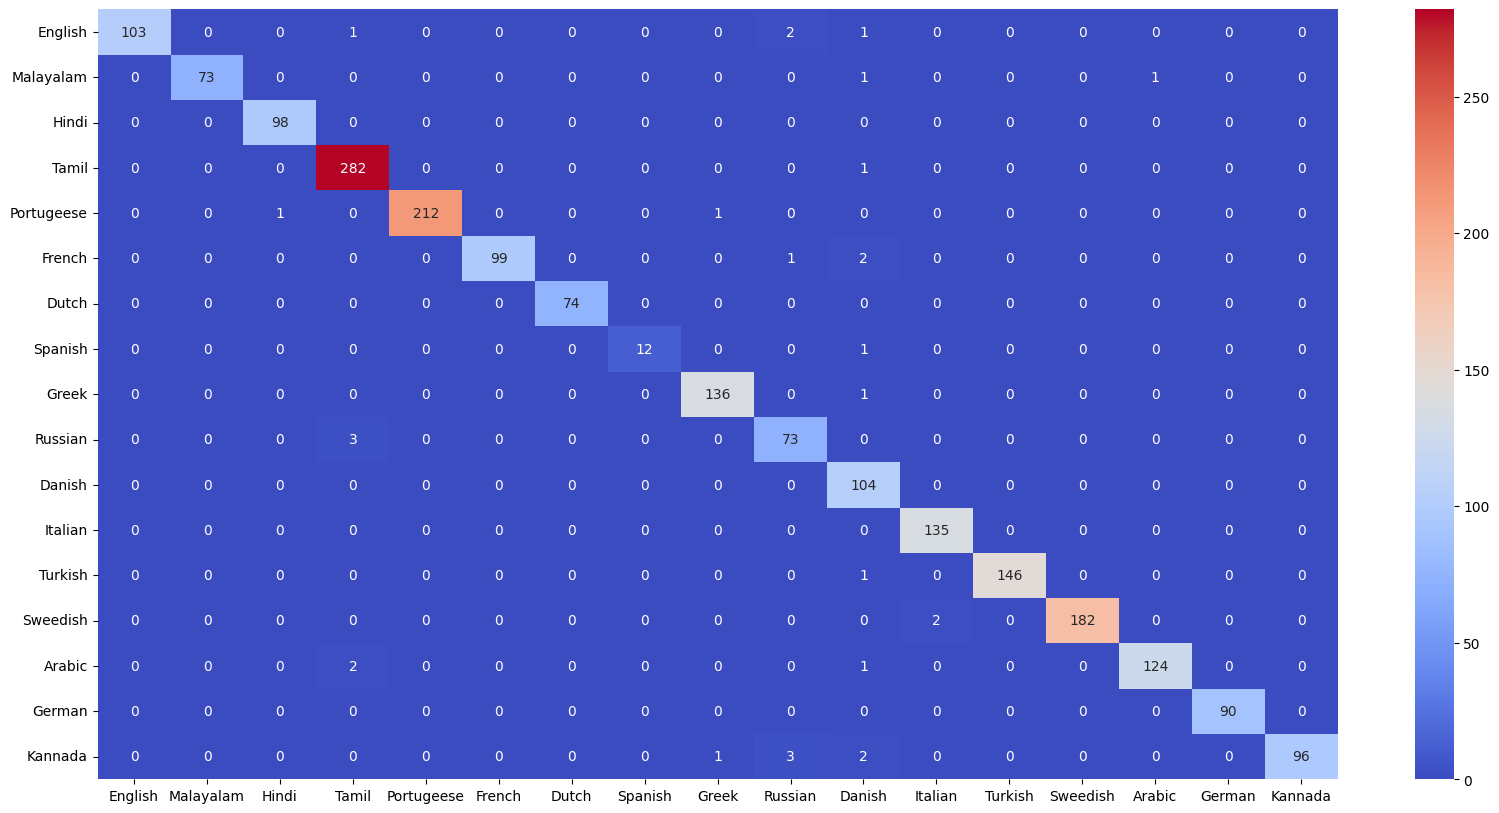

In [22]:
cf = confusion_matrix(y_test,pred)
plt.figure(figsize=(20,10))
unique_labels = df['Language'].unique()
sns.heatmap(cf,annot=True,fmt='g',cmap='coolwarm', xticklabels=unique_labels, yticklabels=unique_labels)
plt.show()

In [23]:
user=input("Enter sentence: ")
ans=np.array([user])
enc_ans=cv.transform(ans)
output=model.predict(enc_ans)
print('The detected language is: ',output[0])

The detected language is:  Malayalam


In [24]:
import numpy as np
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', model)
])

user_input = input("Enter sentence: ")

predicted_language = pipeline.predict([user_input])[0]

print('The detected language is:', predicted_language)


The detected language is: English
